In [2]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix


In [3]:
# Load Dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Preprocess Dataset

# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape → (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [5]:
# Build CNN Model 

model = Sequential([Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),MaxPooling2D((2,2)), 
                    Conv2D(64, (3,3), activation='relu'), MaxPooling2D((2,2)),Flatten(), Dense(128, activation='relu'),
                    Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train Model

history = model.fit(x_train, y_train_cat, validation_split=0.1, epochs=10, batch_size=64)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9474 - loss: 0.1721 - val_accuracy: 0.9808 - val_loss: 0.0615
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9843 - loss: 0.0512 - val_accuracy: 0.9840 - val_loss: 0.0532
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9892 - loss: 0.0347 - val_accuracy: 0.9893 - val_loss: 0.0384
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9921 - loss: 0.0257 - val_accuracy: 0.9900 - val_loss: 0.0343
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9939 - loss: 0.0188 - val_accuracy: 0.9898 - val_loss: 0.0369
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9950 - loss: 0.0148 - val_accuracy: 0.9905 - val_loss: 0.0337
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9962 - loss: 0.0124 - val_accuracy: 0.9923 - val_loss: 0.0308
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9968 - loss: 0.0092 - val_acc

In [7]:
# Evaluate Model

test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print("CNN Model Test Accuracy:", round(test_acc * 100, 2), "%")

CNN Model Test Accuracy: 99.08 %


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


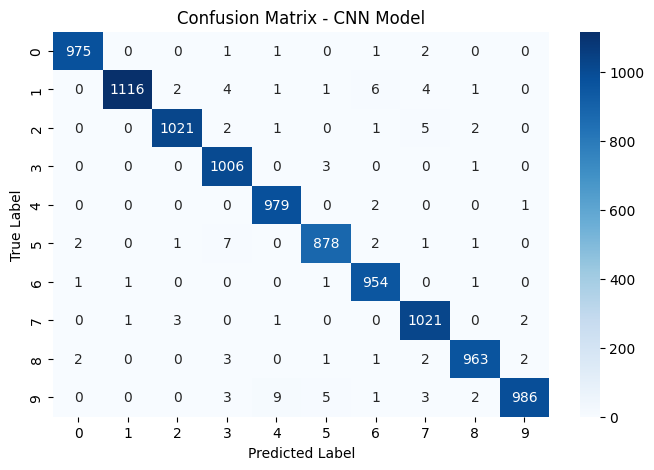

In [14]:
# Confusion Matrix

y_pred = np.argmax(model.predict(x_test), axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - CNN Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

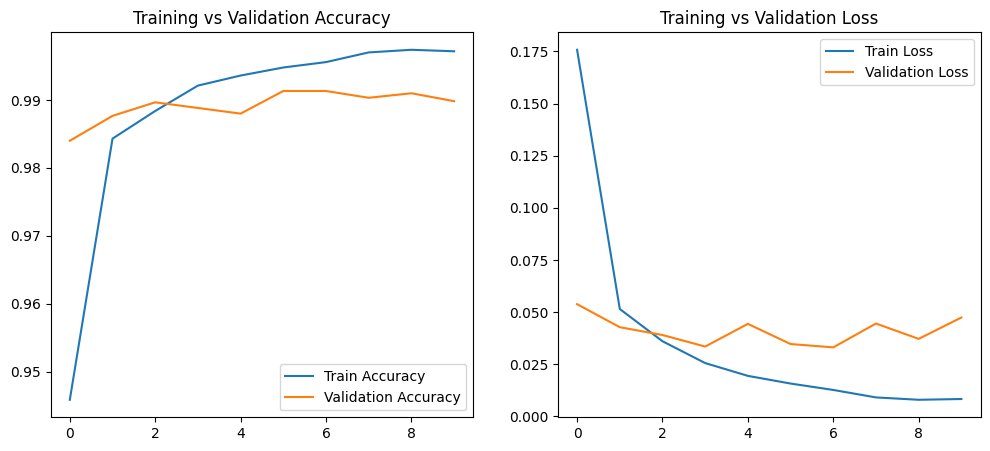

In [15]:
# Plot Training Performance

plt.figure(figsize=(12,5))

# Accuracy Curve
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.legend()

# Loss Curve
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.legend()

plt.show()

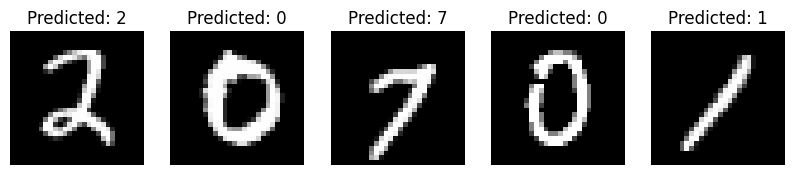

In [16]:
# Sample Predictions

num_samples = 5
indices = np.random.choice(len(x_test), num_samples)

plt.figure(figsize=(10,3))
for i, idx in enumerate(indices):
    img = x_test[idx].reshape(28,28)
    pred = y_pred[idx]
    
    plt.subplot(1, num_samples, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {pred}")
    plt.axis("off")

plt.show()


In [17]:
# Save the trained model
model.save("model.h5")
print("✅ Model saved as model.h5")

✅ Model saved as model.h5
